In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
RANDOM_STATE = 42

In [4]:
# DATASET_PATH = "https://raw.githubusercontent.com/evgpat/edu_stepik_from_idea_to_mvp/main/datasets/clients.csv"
DATASET_PATH = '../data/pilot.csv'

## Загрузка и обзор данных

### Загрузка

In [8]:
# загрузка данных
df = pd.read_csv(DATASET_PATH)
df.columns = [i.replace(" ", "_").lower() for i in df.columns]
start_len = len(df)

# удаление строк, где satisfaction == '-' 
print("До удаления satisfaction == '-':\t", df.shape[0])
df.dropna(inplace=True)
df = df[df['satisfaction'] != '-']
print("После удаления satisfaction == '-':\t", df.shape[0])

До удаления satisfaction == '-':	 129880
После удаления satisfaction == '-':	 102085


### Описание данных

**Целевая переменная**
- `satisfaction`: удовлетворенность клиента полетом, бинарная (*satisfied* или *neutral or dissatisfied*)

**Признаки**
- `Gender` (categorical: _Male_ или _Female_): пол клиента
- `Age` (numeric, int): количество полных лет
- `Customer Type` (categorical: _Loyal Customer_ или _disloyal Customer_): лоялен ли клиент авиакомпании?
- `Type of Travel` (categorical: _Business travel_ или _Personal Travel_): тип поездки
- `Class` (categorical: _Business_ или _Eco_, или _Eco Plus_): класс обслуживания в самолете
- `Flight Distance` (numeric, int): дальность перелета (в милях)
- `Departure Delay in Minutes` (numeric, int): задержка отправления (неотрицательная)
- `Arrival Delay in Minutes` (numeric, int): задержка прибытия (неотрицательная)
- `Inflight wifi service` (categorical, int): оценка клиентом интернета на борту
- `Departure/Arrival time convenient` (categorical, int): оценка клиентом удобство времени прилета и вылета
- `Ease of Online booking` (categorical, int): оценка клиентом удобства онлайн-бронирования
- `Gate location` (categorical, int): оценка клиентом расположения выхода на посадку в аэропорту
- `Food and drink` (categorical, int): оценка клиентом еды и напитков на борту
- `Online boarding` (categorical, int): оценка клиентом выбора места в самолете
- `Seat comfort` (categorical, int): оценка клиентом удобства сиденья
- `Inflight entertainment` (categorical, int): оценка клиентом развлечений на борту
- `On-board service` (categorical, int): оценка клиентом обслуживания на борту
- `Leg room service` (categorical, int): оценка клиентом места в ногах на борту
- `Baggage handling` (categorical, int): оценка клиентом обращения с багажом
- `Checkin service` (categorical, int): оценка клиентом регистрации на рейс
- `Inflight service` (categorical, int): оценка клиентом обслуживания на борту
- `Cleanliness` (categorical, int): оценка клиентом чистоты на борту

## Препроцессинг оценок опрошеных клиентов

,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure/arrival_time_convenient,inflight_wifi_service
count,102085.000000,102085.000000,102085.000000,102085.000000,102085.000000,102085.000000,102085.000000,102085.000000,102085.000000,102085.000000,102085.000000,102085.000000,102085.000000,102085.000000
mean,2.760915,2.982191,3.204584,3.255062,3.443454,3.361326,3.386874,3.357212,3.635794,3.308547,3.645305,3.289269,3.065142,2.733281
std,1.422714,1.308681,1.352929,1.386338,1.345700,1.356854,1.335507,1.366766,1.222298,1.302760,1.212639,1.341797,1.554720,1.358823
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,4.000000,4.000000
max,45.000000,36.000000,45.000000,40.000000,45.000000,40.000000,45.000000,40.000000,40.000000,45.000000,36.000000,45.000000,45.000000,45.000000


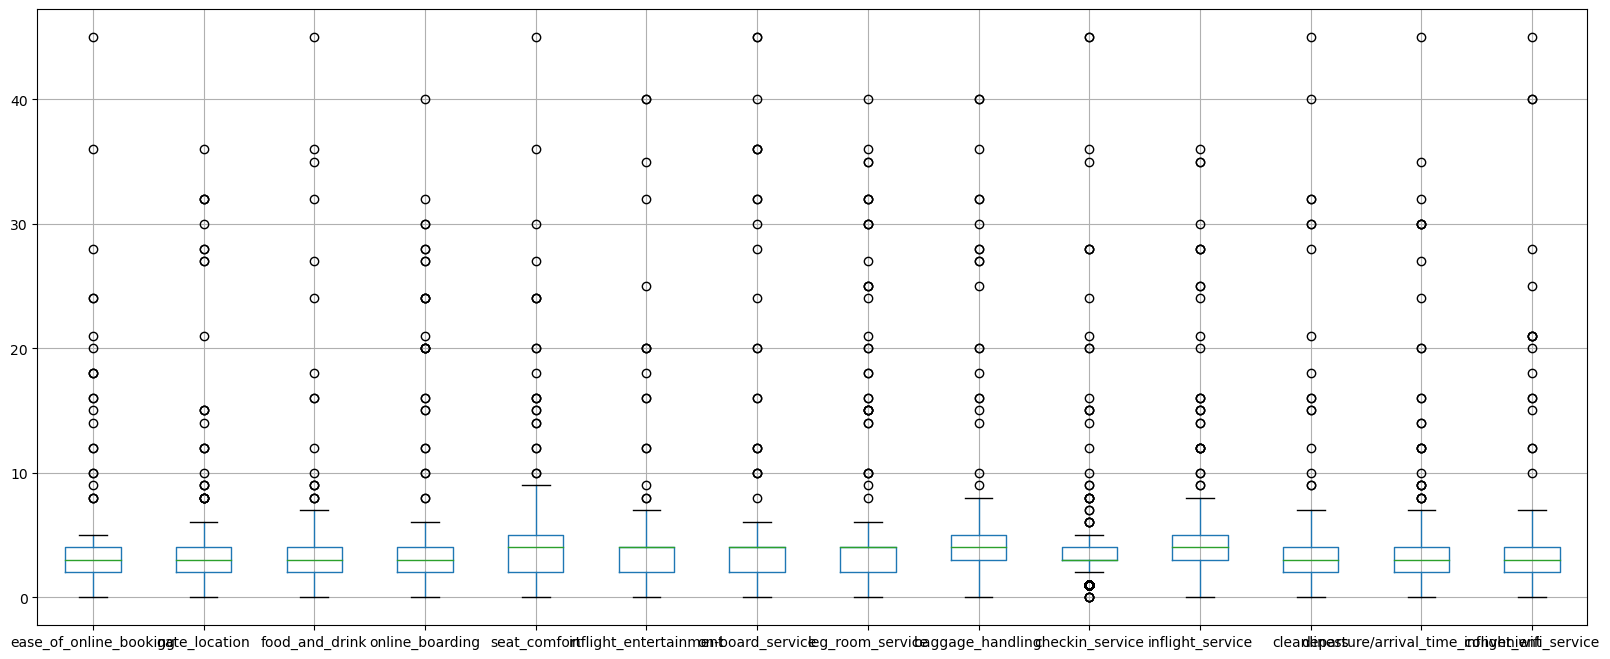

In [9]:
col_points = ['ease_of_online_booking', 'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort', 
                      'inflight_entertainment', 'on-board_service', 'leg_room_service','baggage_handling', 
                      'checkin_service', 'inflight_service','cleanliness', 'departure/arrival_time_convenient',
                      'inflight_wifi_service']
df_point = df[col_points]
#df[col_points].hist(figsize=(20,8), layout=(-1,4), bins=10);
df_point.boxplot(column=col_points, figsize=(20,8));
df_point.describe()


Видим, что 75% данных всегда лежат в диапазоне до 5, лишь немного больше. Выдвигаем предположение, что в ответах  использована 5-ти бальная шкала.

Также видно, что все данные лежат в диапазоне до 50. Выдвигаем предположение, что все данные, имеющие значения больше 5 - это дробные значения с потерянной точкой (4,5 -> 45). 

Соответственно преобразуем данные.

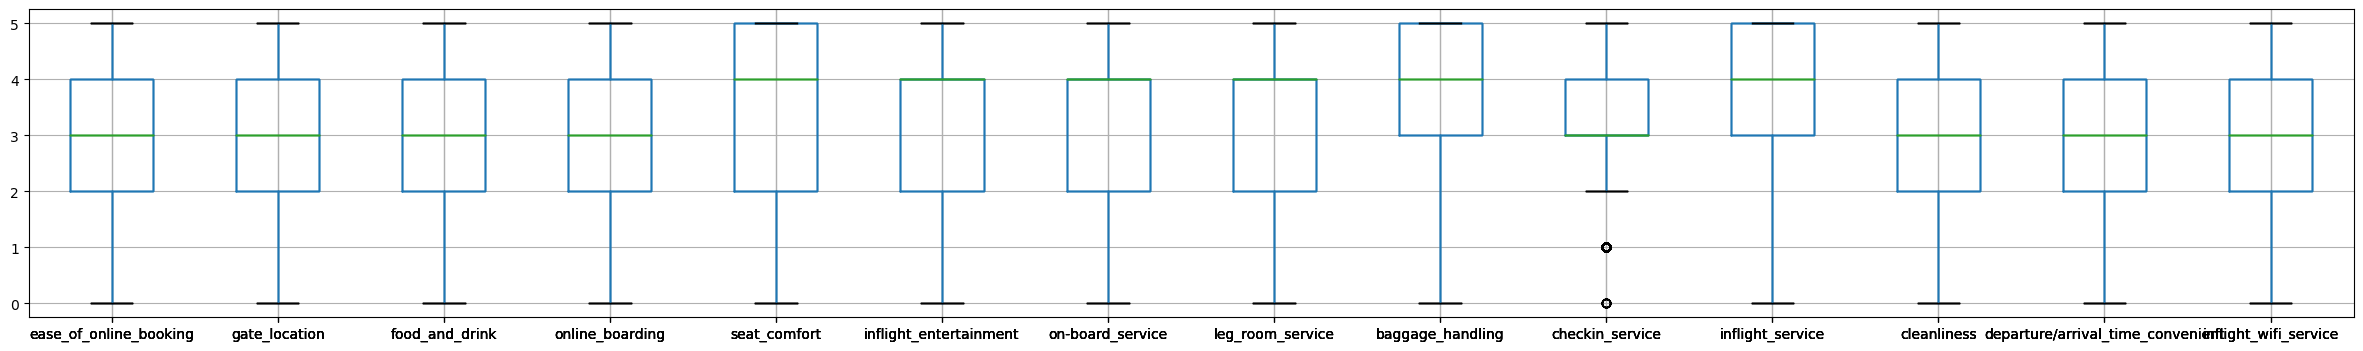

In [13]:
def to_5_points (df_x, list_columns):
    for i in list_columns:
        df_x = df_x.dropna()
        df_x.loc[:, i] = df_x.loc[:, i].apply(lambda x: int(x) if x <= 5 else int(round(x/10)))
    return df_x
df_point = to_5_points(df_point, col_points)
df_point.describe()
df_point.boxplot(column=col_points, figsize=(30,4));
plt.show()

## Препроцессинг float переменных (age, distance и два delay)

### Обработка age

In [14]:
col_float = ['age', 'flight_distance', 'arrival_delay_in_minutes', 'departure_delay_in_minutes']
df_float = df[col_float]

age
flight_distance
arrival_delay_in_minutes
departure_delay_in_minutes


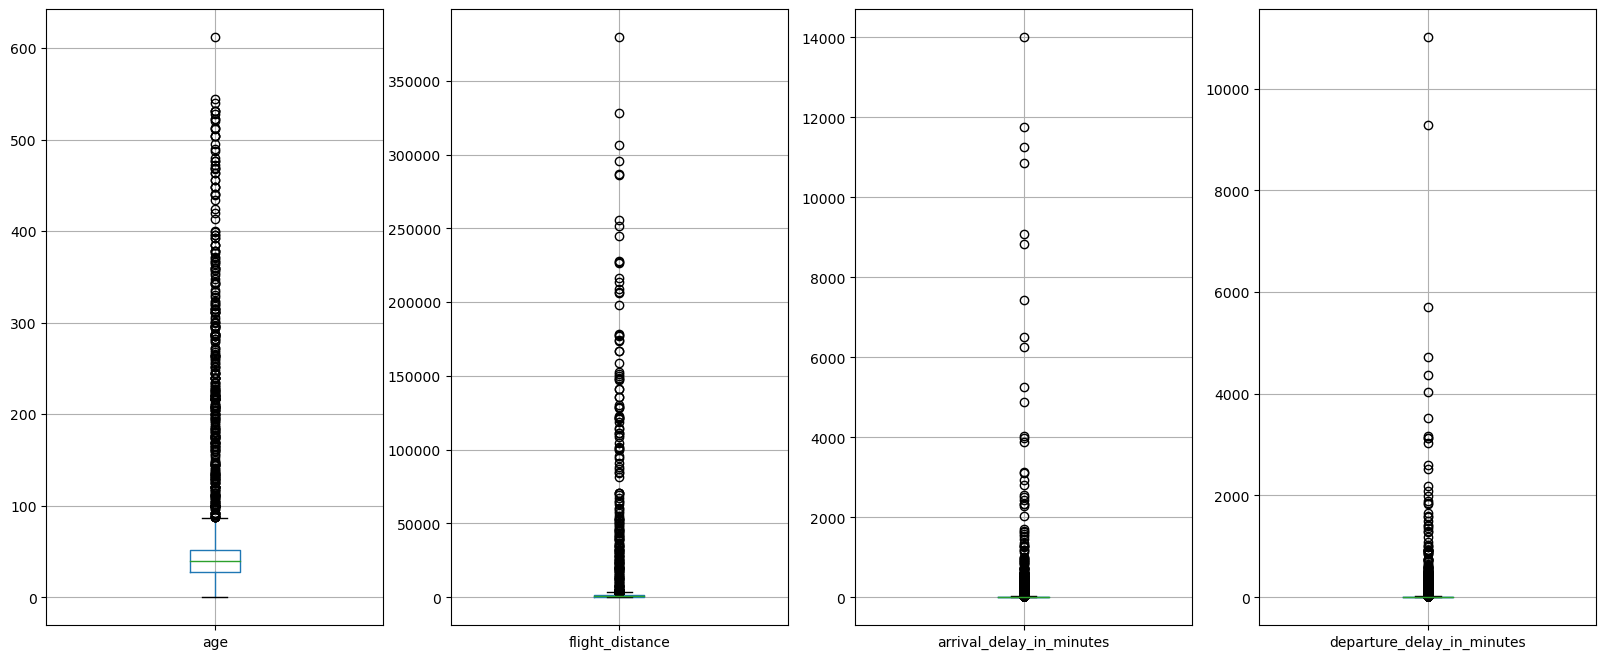

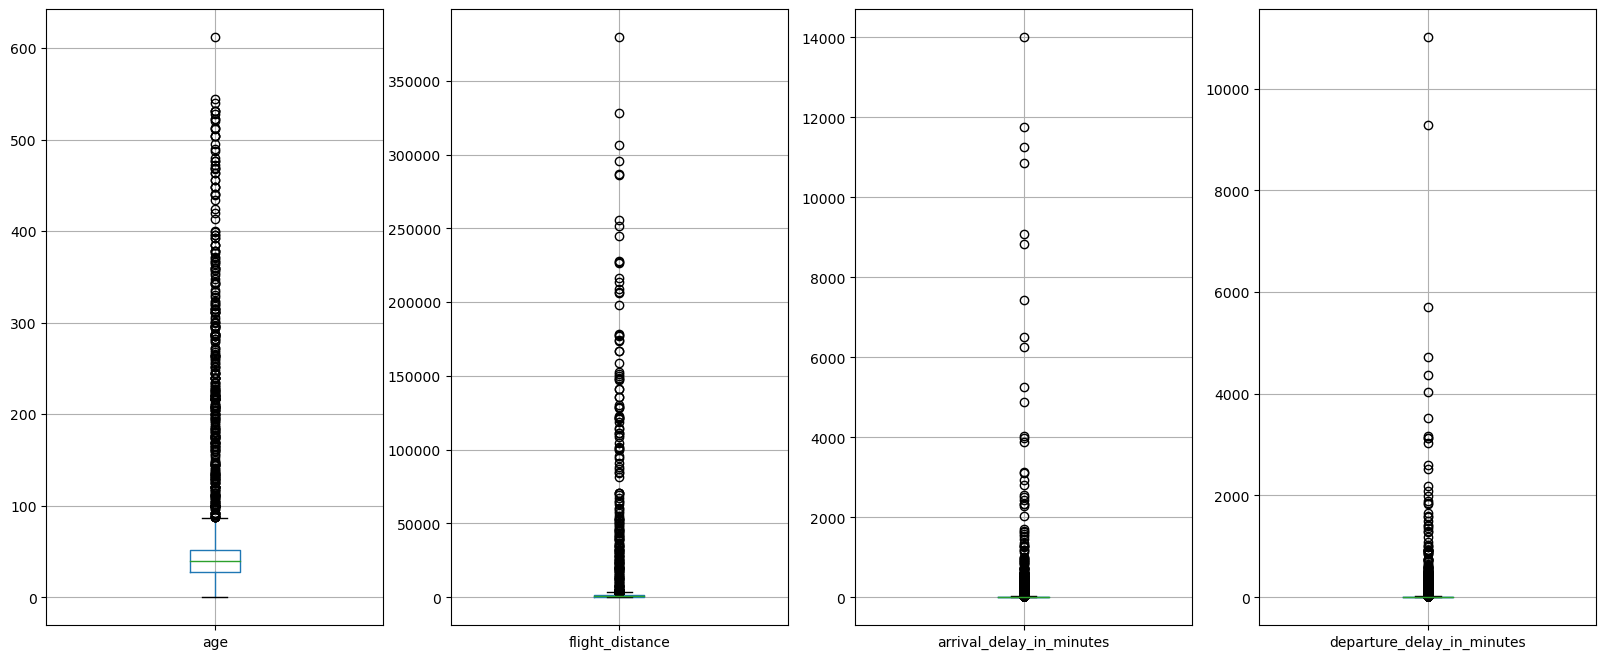

In [16]:
# вывод boxplot
lens = len(df_float.columns)
plt.figure(figsize=(20,8))
for col_x, num_graph in zip(df_float.columns, range(lens)):
    plt.subplot(1,lens,  num_graph+1)
    print(col_x)
    df_float[[col_x]].boxplot()
plt.show()

### Посмотрим на границы распределения возрастов с целью найти нехорошие данные

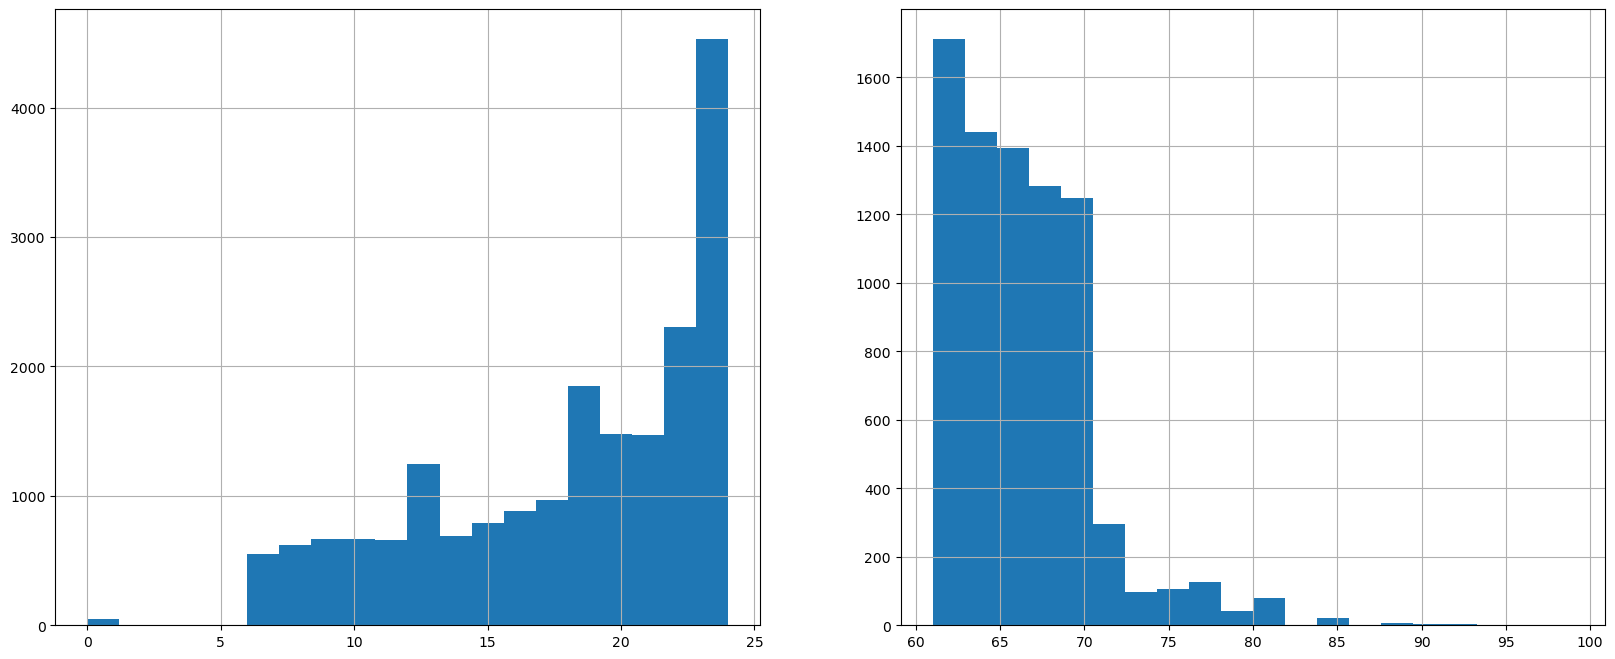

In [24]:
# обрабатываем возраст
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
df_float[(df_float['age']<25)]['age'].hist(bins=20)
plt.subplot(1,2,2)
df_float[(df_float['age']<100) & (df_float['age'] > 60)]['age'].hist(bins=20)
plt.show();

Граница по возрасту разумная от 7 лет (0 - выбросы) до 70 лет.

Разумно предположить, что значения больше 70 это дробные значения возраста, которые неверно перевели в целые.

Произведем соответствующие преобразования:

In [25]:
def prep_age(x):
    if x >=7 and x <= 70: return x
    else:
        return round(x/10)
    
df_float = df_float[df_float['age'] >= 7]
df_float['age'] = df_float['age'].apply(prep_age)

### Обработка flying_distance

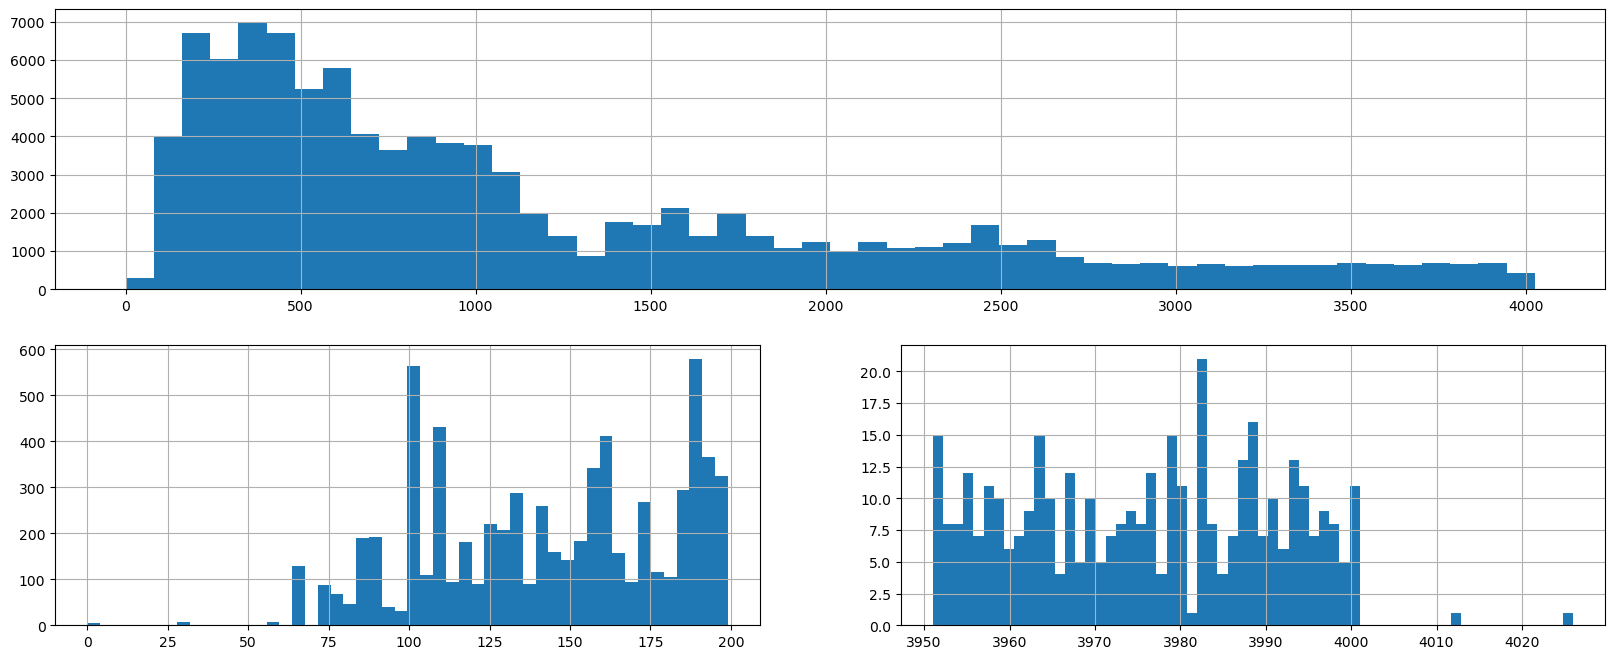

In [28]:
# обработка расстояния (distance)
# стоит учесть, что расстояние указано в милях и значение 25 000 - это кругосветное путешествие.
# следовательно, все, что выше 25 000 - нужно делить на 1000, предполагая, что значения указаны в миллиМилях
plt.figure(figsize=(20,8))
plt.subplot(2,1,1)
df_float[(df_float['flight_distance']< 4200)]['flight_distance'].hist(bins=50)
plt.subplot(2,2,3)
df_float[(df_float['flight_distance']< 200)]['flight_distance'].hist(bins=50)
plt.subplot(2,2,4)
df_float[(df_float['flight_distance']< 4200) & (df_float['flight_distance'] > 3950)]['flight_distance'].hist(bins=63)
plt.show()

Видим, что c минимальной границей значений все хорошо (редко катаются на короткие дистанции)

Cверху жесткая граница при привышении 4000 миль. Будто выше 4000 данные либо не собирались (и это выбросы), либо это некорректные введенные данные (данные собирались только сперелетов до 4000 миль, а эти были введены некорректно).

Переведем данные, разделив их на 1000

In [29]:
def fly_preproc(x):
    if x > 4000: return round(x/1000)
    return x
df_float['flight_distance'] = df_float['flight_distance'].apply(fly_preproc)

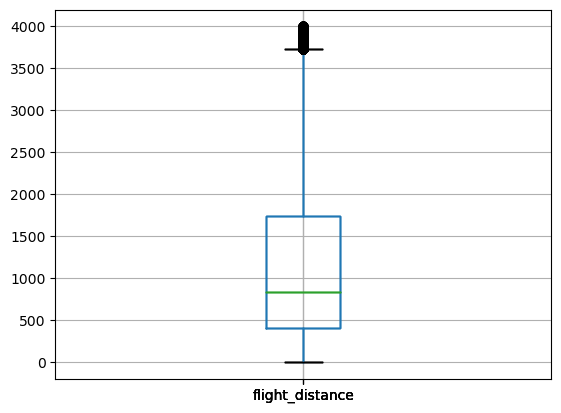

In [33]:
df_float[['flight_distance']].boxplot();
plt.show()

### Безуспешная попытка обработать arrival и department delay столбцы

In [6]:
df_bad = df[(df['satisfaction'] == 'neutral or dissatisfied') ]['arrival_delay_in_minutes']
df_good = df[(df['satisfaction'] == 'satisfied') ]['arrival_delay_in_minutes']
df_3 = df['arrival_delay_in_minutes']
pd.concat([df_bad, df_good, df_3], axis=1).describe()

,arrival_delay_in_minutes,arrival_delay_in_minutes,arrival_delay_in_minutes
count,57802.000000,44237.000000,102039.000000
mean,18.739179,14.236996,16.787346
std,106.821737,113.430756,109.757966
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,17.000000,8.000000,13.000000
max,11760.000000,14006.000000,14006.000000


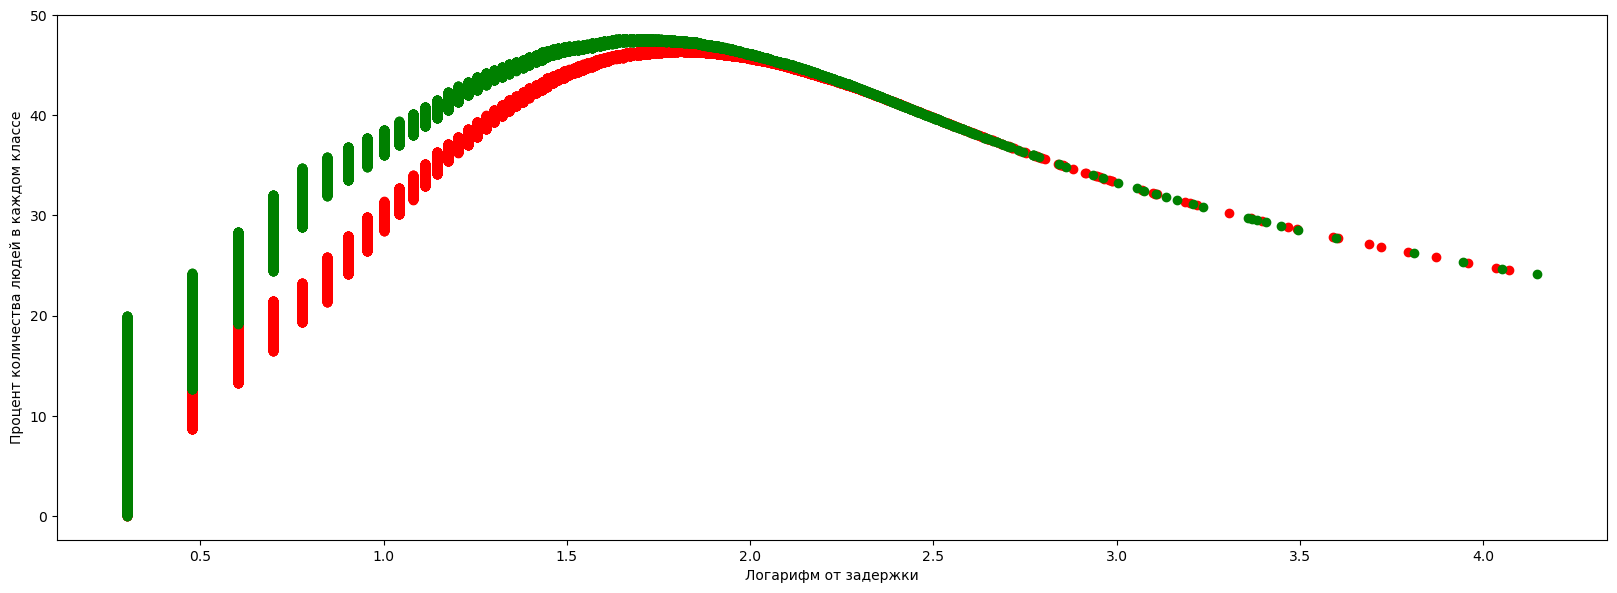

In [8]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
# при убирании нулей
df_bad = df_bad[~df_bad.isin([0])]
df_good = df_good[~df_good.isin([0])]

x_bad = np.array(list(map(math.log10, df_bad.sort_values().values+1)))#/27615*20000    # нормировка и приведение к единицам
x_good = np.array(list(map(math.log10, df_good.sort_values().values+1)))#/17137*20000  # нормировка и приведение к единицам
y_bad = np.arange(27615)/276.15
y_good = np.arange(17137)/171.37
plt.scatter(x_bad, y_bad/x_bad, c='red')
plt.scatter(x_good, y_good/x_good, c='green');

# С НУЛЯМИ
#plt.plot(np.array(list(map(math.log10, df_bad.sort_values().values+1)))/57802, np.arange(57802)/578.02, c='red')
#plt.plot(np.array(list(map(math.log10, df_good.sort_values().values+1)))/44237, np.arange(44237)/442.37, c='green');

# без логарифмирования - ужасно
# plt.plot(np.array(list(map(math.log10, df_bad.sort_values().values+1)))/57802, np.arange(57802)/578.02, c='red')
# plt.plot(np.array(list(map(math.log10, df_good.sort_values().values+1)))/44237, np.arange(44237)/442.37, c='green');

plt.ylabel("Процент количества людей в каждом классе")
plt.xlabel("Логарифм от задержки");


## Полный препроцессинг в одной ячейке

In [36]:
# загрузка данных
df = pd.read_csv(DATASET_PATH)
df.columns = [i.replace(" ", "_").lower() for i in df.columns]
start_len = len(df)

# удаление satisfaction = '-'
print("До удаления satisfaction == '-':\t", df.shape[0])
df.dropna(inplace=True)
df = df[df['satisfaction'] != '-']
print("После удаления satisfaction == '-':\t", df.shape[0])


# перед обработкой применим данные преобразования
col_points = ['ease_of_online_booking', 'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort', 
                      'inflight_entertainment', 'on-board_service', 'leg_room_service','baggage_handling', 
                      'checkin_service', 'inflight_service','cleanliness', 'departure/arrival_time_convenient',
                      'inflight_wifi_service']


def to_5_points (df_x, list_columns):
    for i in list_columns:
        df_x = df_x.dropna()
        df_x.loc[:, i] = df_x.loc[:, i].apply(lambda x: int(x) if x <= 5 else int(round(x/10)))
    return df_x

def prep_age(x):
    if x >=7 and x <= 70: return int(x)
    else:
        return int(round(x/10))

def fly_preproc(x):
    if x > 4000: return int(round(x/1000))
    return int(x)

df = to_5_points(df, col_points)

print("Преобразование столбца age ", end="... ")
df = df[df['age'] >= 7]
df['age'] = df['age'].apply(prep_age)
print("ОК")

print("Преобразование столбца flight_distance ", end="... ")
df['flight_distance'] = df['flight_distance'].apply(fly_preproc)
print("ОК")

print("Бинарное кодирование целевого столбца ", end="... ")
df['satisfaction'] = df['satisfaction'].apply(lambda x: 1 if x=='satisfied' else 0)
print("ОК")

print("Бинарное кодирование бинарных категориальных столбцов ", end="... ")
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})
df['type_of_travel'] = df['type_of_travel'].map({'Business travel':1,  'Personal Travel': 0})
df['customer_type'] = df['customer_type'].map({'Loyal Customer': 1, 'disloyal Customer': 0})
df['class'] = df['class'].map({'Business': 2,'Eco Plus': 1, 'Eco': 0})
print("ОК")

# удаление столбцов id и delay
print("Удаление столбцов, из которых не получилось извлечь полезной информации", end="... ")
df.drop(['id', 'arrival_delay_in_minutes', 'departure_delay_in_minutes'], axis=1, inplace=True)
print("ОК")

До удаления satisfaction == '-':	 129880
После удаления satisfaction == '-':	 102085


C:\Users\Lev\AppData\Local\Temp\ipykernel_10712\2595897929.py:23: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_x.loc[:, i] = df_x.loc[:, i].apply(lambda x: int(x) if x <= 5 else int(round(x/10)))


Преобразование столбца age ... ОК
Преобразование столбца flight_distance ... ОК
Бинарное кодирование целевого столбца ... ОК
Бинарное кодирование бинарных категориальных столбцов ... ОК
Удаление столбцов, из которых не получилось извлечь полезной информации... ОК


In [38]:
df.to_csv('../data/pilot_preprocessing.csv', index=False)